In [43]:
import numpy as np
import pandas as pd


# causal-learn imports
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.score.LocalScoreFunction import local_score_BIC, local_score_BDeu


#from causallearn.score.LocalScoreFunction import local_score_CV_general

# visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io

In [44]:
data = pd.read_csv("C:/Users/sahil/Downloads/archive/Student_Performance.csv")

In [45]:
test = data.copy()

In [46]:
test = test.drop(['Extracurricular Activities'], axis = 1)
def standardise(x):
    return (x -x.mean())/(x.max() - x.min())
test = test.apply(standardise, axis = 1)
test.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,0.036465,0.324943,-0.176584,-0.322022
Previous Scores,0.036465,1.000000,0.581578,0.749652,-0.836131
Sleep Hours,0.324943,0.581578,1.000000,0.442572,-0.859907
Sample Question Papers Practiced,-0.176584,0.749652,0.442572,1.000000,-0.770127
Performance Index,-0.322022,-0.836131,-0.859907,-0.770127,1.000000


In [47]:
import random


def introduce_noise(x):
    return x + random.randint(0,10)/10

test = test.apply(introduce_noise, axis = 0)

In [48]:
test_np = test.to_numpy()
test_np

array([[0.54897959, 1.5877551 , 0.56938776, 0.0877551 , 1.20612245],
       [0.5575    , 1.6325    , 0.5575    , 0.1325    , 1.12      ],
       [0.60204082, 1.57959184, 0.58163265, 0.07959184, 1.15714286],
       ...,
       [0.52564103, 1.61282051, 0.55128205, 0.11282051, 1.1974359 ],
       [0.56391753, 1.57113402, 0.54329897, 0.07113402, 1.25051546],
       [0.5739726 , 1.59178082, 0.58767123, 0.09178082, 1.15479452]],
      shape=(10000, 5))

In [41]:
# run FCI
X = test_np
params = {
    "kfold": 5,   # number of CV folds
    "lambda": 1.0 # ridge regression penalty to stabilize regression
}
#Kflold is for cross-validation and Lmbda is penalty for ridge regression for scores calculation and identify which has the highest 
print(f"Running GES on data with shape {X.shape} ...")
result = ges(X, score_func= "local_score_BIC", maxP=4, parameters = params)

Running GES on data with shape (10000, 5) ...


Graph saved to causal_graph.png


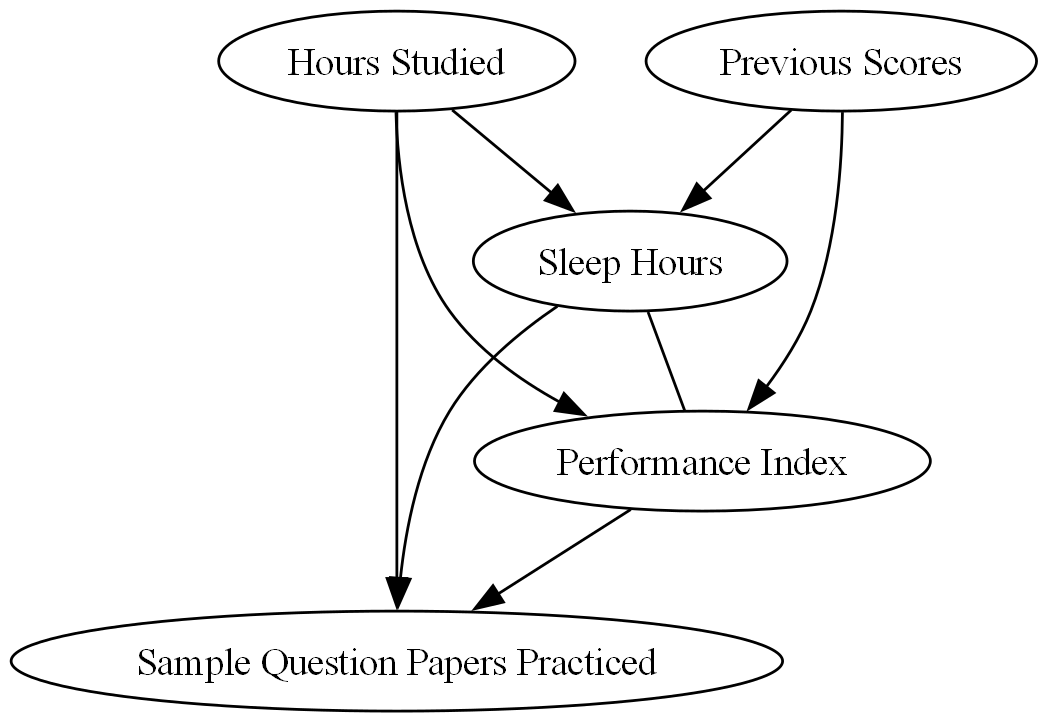

In [42]:
pydot_graph = GraphUtils.to_pydot(result["G"], labels=list(test.columns))


# Save and display the graph
try:
    pydot_graph.write_png('causal_graph.png')
    print("Graph saved to causal_graph.png")
    
    # If in a Jupyter environment, this will display the image
    from IPython.display import Image, display
    display(Image(pydot_graph.create_png()))
    
except Exception as e:
    print(f"Error during visualization: {e}")
    print("Please ensure Graphviz is installed and in your system's PATH.")

In [22]:
X

array([[-0.05102041,  0.9877551 ,  0.06938776, -0.1122449 ,  1.40612245],
       [-0.0425    ,  1.0325    ,  0.0575    , -0.0675    ,  1.32      ],
       [ 0.00204082,  0.97959184,  0.08163265, -0.12040816,  1.35714286],
       ...,
       [-0.07435897,  1.01282051,  0.05128205, -0.08717949,  1.3974359 ],
       [-0.03608247,  0.97113402,  0.04329897, -0.12886598,  1.45051546],
       [-0.0260274 ,  0.99178082,  0.08767123, -0.10821918,  1.35479452]],
      shape=(10000, 5))

In [49]:
def convert(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return None

In [50]:
test = pd.DataFrame(test_np, columns = test.columns)
test = pd.concat([test, data['Extracurricular Activities']], axis = 1)
test['Extracurricular Activities'] = test['Extracurricular Activities'].apply(convert)
test.head(n = 4)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,0.548980,1.587755,0.569388,0.087755,1.206122,1
1,0.557500,1.632500,0.557500,0.132500,1.120000,0
2,0.602041,1.579592,0.581633,0.079592,1.157143,1
3,0.600000,1.640000,0.600000,0.140000,1.020000,1


In [53]:
test_np = test.to_numpy()
test_np

array([[0.54897959, 1.5877551 , 0.56938776, 0.0877551 , 1.20612245,
        1.        ],
       [0.5575    , 1.6325    , 0.5575    , 0.1325    , 1.12      ,
        0.        ],
       [0.60204082, 1.57959184, 0.58163265, 0.07959184, 1.15714286,
        1.        ],
       ...,
       [0.52564103, 1.61282051, 0.55128205, 0.11282051, 1.1974359 ,
        1.        ],
       [0.56391753, 1.57113402, 0.54329897, 0.07113402, 1.25051546,
        1.        ],
       [0.5739726 , 1.59178082, 0.58767123, 0.09178082, 1.15479452,
        0.        ]], shape=(10000, 6))

In [ ]:
# run FCI
X = test_np
params = {
    "kfold": 5,   # number of CV folds
    "lambda": 1.0 # ridge regression penalty to stabilize regression
}
#Kflold is for cross-validation and Lmbda is penalty for ridge regression for scores calculation and identify which has the highest 
print(f"Running GES on data with shape {X.shape} ...")
result = ges(X, score_func= "local_score_CV_general", maxP=4, parameters = params)

Running GES on data with shape (10000, 6) ...


In [ ]:
pydot_graph = GraphUtils.to_pydot(result["G"], labels=list(test.columns))


# Save and display the graph
try:
    pydot_graph.write_png('causal_graph.png')
    print("Graph saved to causal_graph.png")
    
    # If in a Jupyter environment, this will display the image
    from IPython.display import Image, display
    display(Image(pydot_graph.create_png()))
    
except Exception as e:
    print(f"Error during visualization: {e}")
    print("Please ensure Graphviz is installed and in your system's PATH.")